<a href="https://colab.research.google.com/github/asange/mit-deep-learning/blob/master/class1-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.13.0-rc1


In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57344/57026 [==============================] - 0s 0us/step


In [6]:
print(train_labels.shape())

TypeError: ignored

In [0]:
def build_model():
  model = keras.Sequential([
      Dense(20, activation = tf.nn.relu, input_shape = [len(train_features[0])]), 
      Dense(1)
      
  ])
  
  model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'mse', metrics = ['mae', 'mse'])
  return model

In [7]:
class PrintDoc(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
 
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs = 1000, verbose = 0, 
                   validation_split=0.1, callbacks=[early_stop, PrintDoc()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................
Final Root Mean Square Error on validation set: 2.422


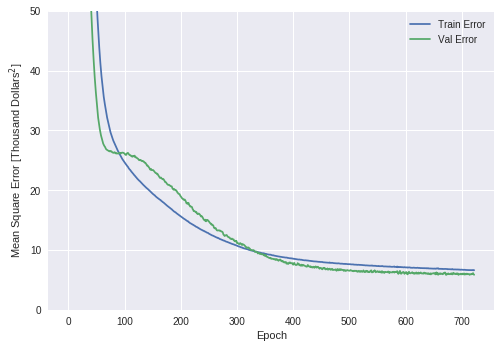

In [10]:
def plot_history():
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
  plt.legend()
  plt.ylim([0,50])

plot_history()

In [11]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 119us/sample - loss: 15.8782 - mean_absolute_error: 2.6141 - mean_squared_error: 15.8782
Root Mean Square Error on test set: 3.985
